# The Promotion Effect


#TODO Intro xxxxx

## Exploratory Data Analysis

#TODO EDA intro xxxx

In [1]:
import pandas as pd

df = pd.read_csv("data/promotion-data.csv")

df.drop(columns=['Year of Promotion']).describe().style.format("{:.2f}").set_caption("Summary Statistics")

#TODO Brief discussion of summary statistic ^

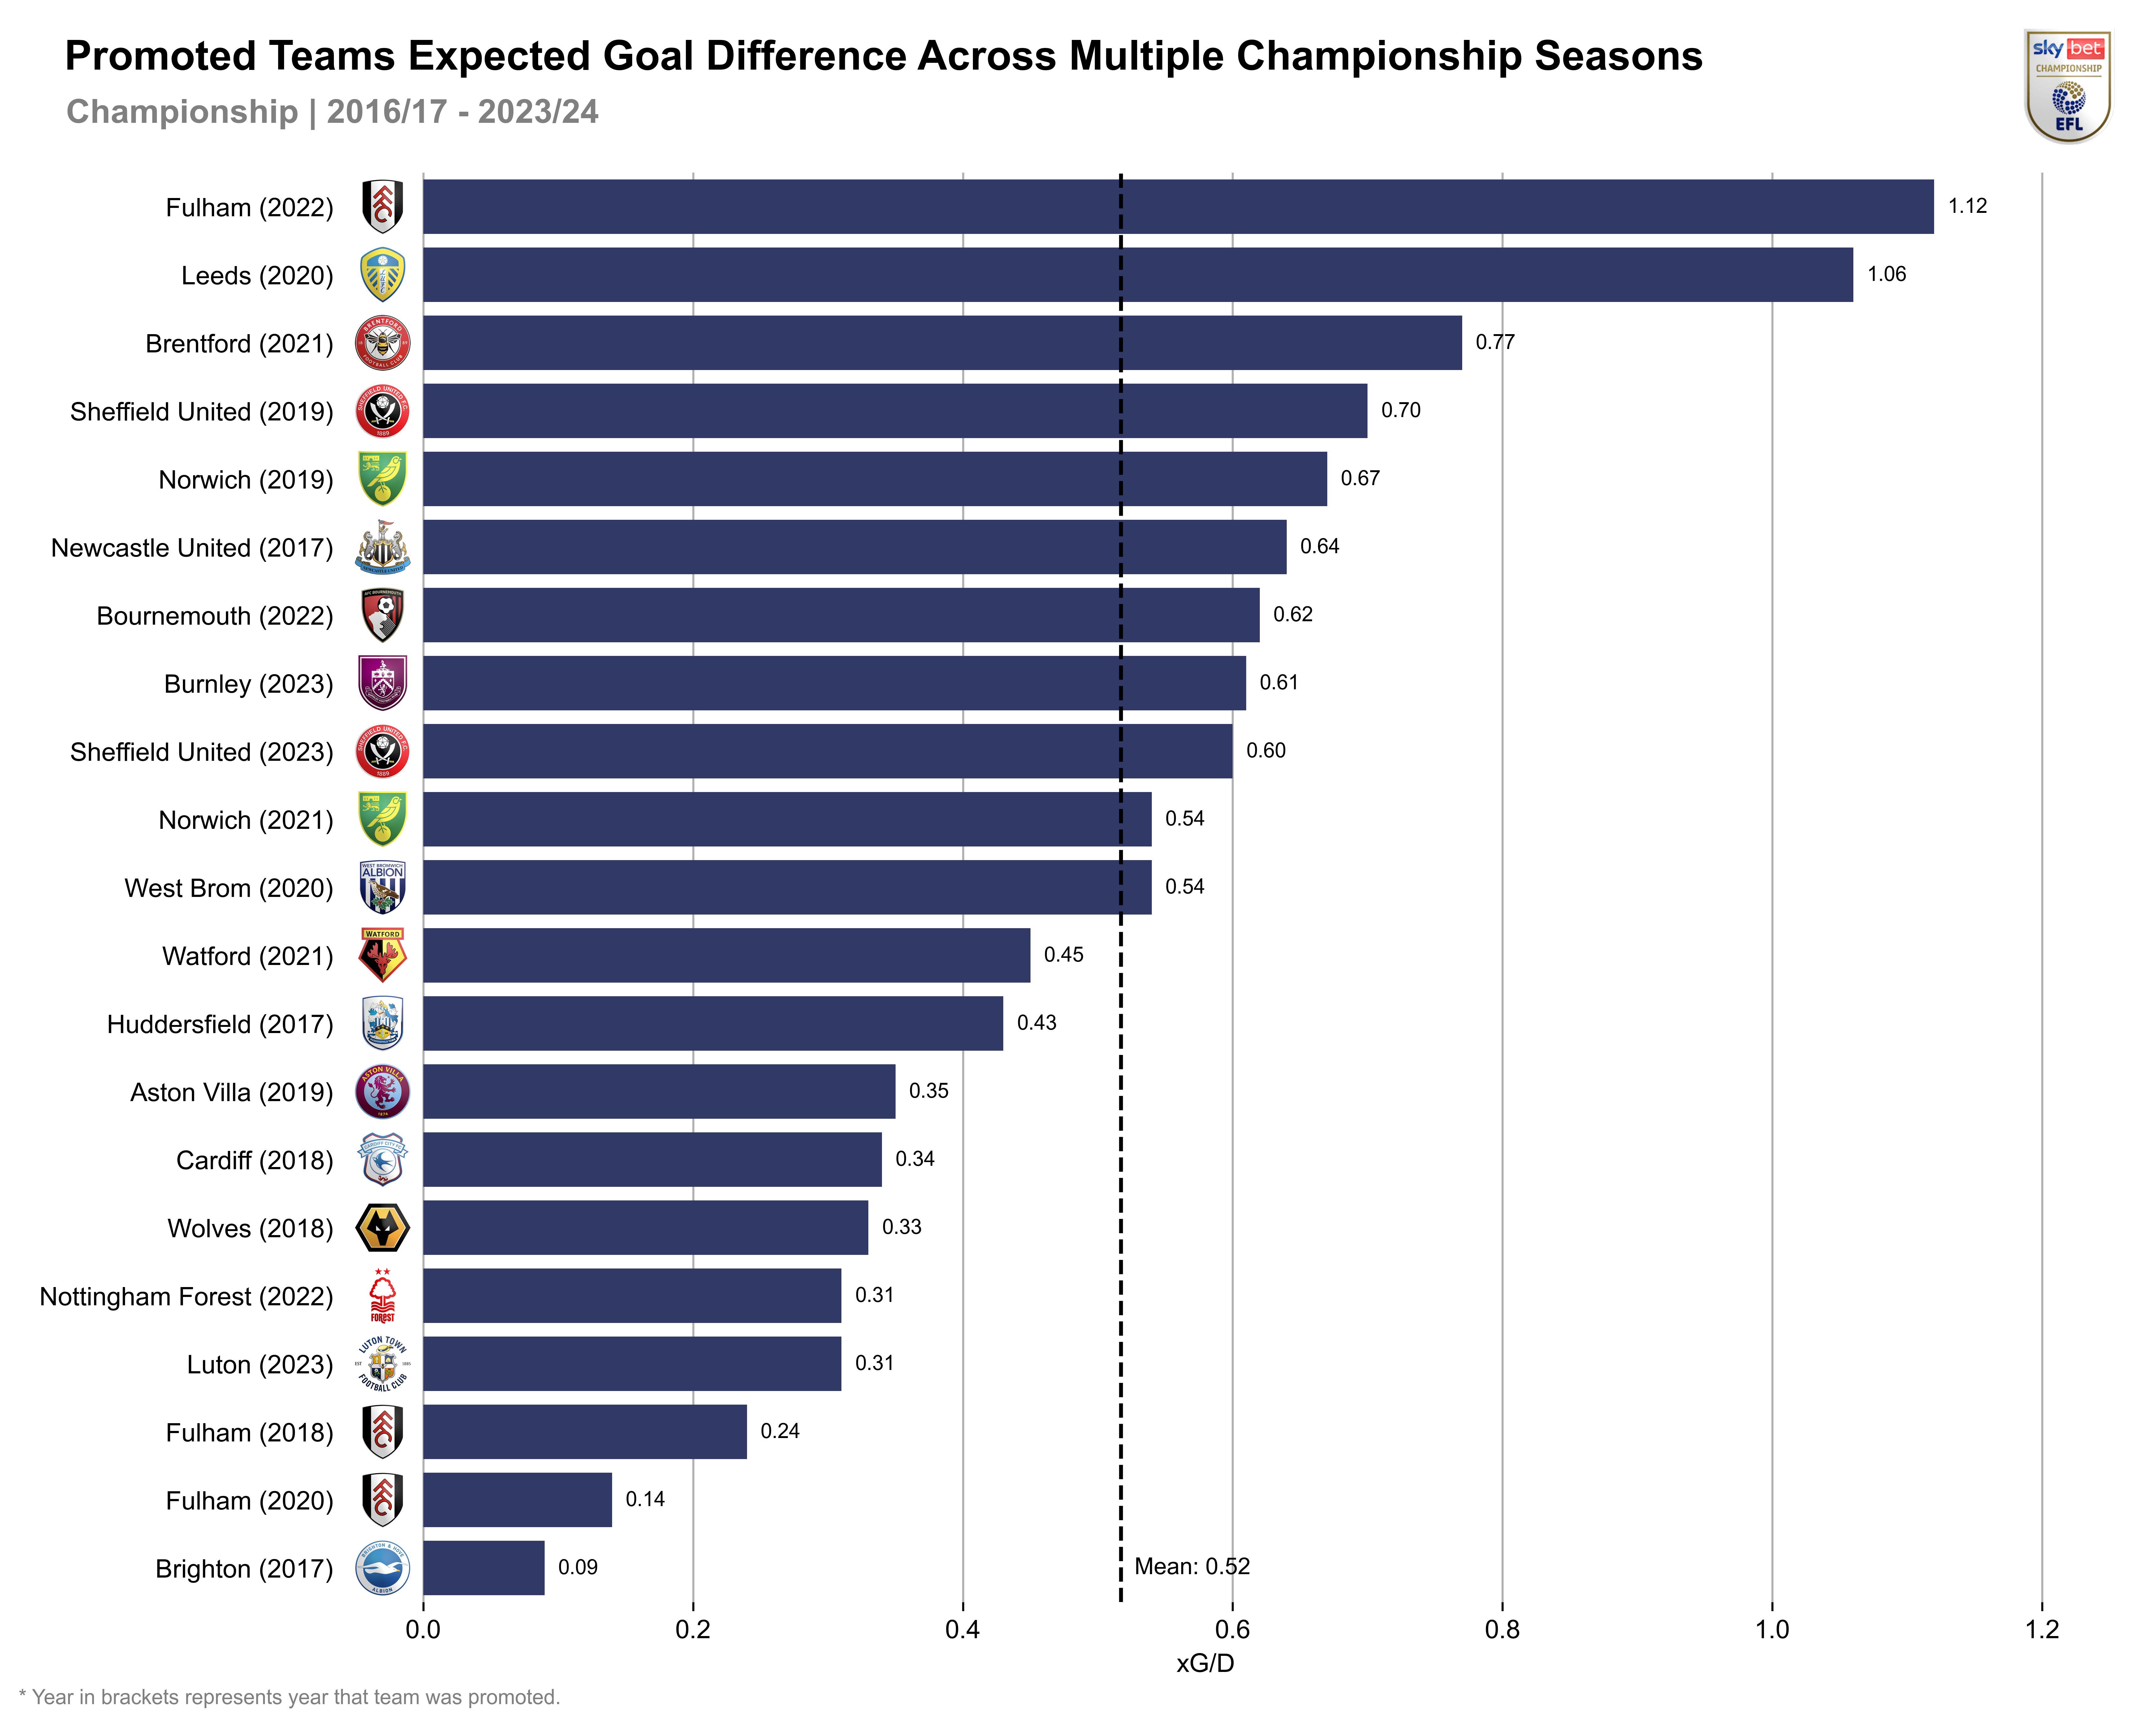

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


df["Team-Year"] = df["Team"] + " (" + df["Year of Promotion"].astype(str) + ")"

df_champ_xgd_sorted = df.sort_values(by="CHA xGD", ascending=False).reset_index()
mean_champ_xgd = df["CHA xGD"].mean()

logo_dict = {
    "Aston Villa": r"images\603.png",
    "Bournemouth": r"images\600.png",
    "Brentford": r"images\617.png",
    "Brighton": r"images\618.png",
    "Burnley": r"images\622.png",
    "Cardiff": r"images\625.png",
    "Nottingham Forest": r"images\692.png",
    "Fulham": r"images\654.png",
    "Huddersfield": r"images\664.png",
    "Leeds": r"images\671.png",
    "Luton": r"images\677.png",
    "Newcastle United": r"images\688.png",
    "Norwich": r"images\691.png",
    "Sheffield United": r"images\708.png",
    "Watford": r"images\732.png",
    "West Brom": r"images\734.png",
    "Wolves": r"images\740.png"
}

plt.rcParams.update({
    'font.family': 'arial'
})

plt.figure(figsize=(12, 10), dpi=600)
plt.xlim(min(df_champ_xgd_sorted["CHA xGD"]) - 0.15, max(df_champ_xgd_sorted["CHA xGD"]) + 0.1)


ax = sns.barplot(y="Team-Year", x="CHA xGD", data=df_champ_xgd_sorted, color="#283270")

for i, team_year in enumerate(df_champ_xgd_sorted['Team-Year']):
    team = team_year.split(" (")[0]

    y_val = i  
    x_val = df_champ_xgd_sorted.loc[i, "CHA xGD"]
    
    logo_path = logo_dict[team]
    
    logo_image = OffsetImage(plt.imread(logo_path), zoom=0.12) 
    
    ab = AnnotationBbox(logo_image, (min(df_champ_xgd_sorted["CHA xGD"]) - 0.12, y_val), frameon=False, box_alignment=(0.5, 0.5))  
    ax.add_artist(ab)

    plt.text(x_val + 0.01, y_val+0.01, f"{x_val:.2f}", va="center", ha="left", 
             fontdict={"fontsize": 8, "color": "black"})



plt.axvline(mean_champ_xgd, color="black", linestyle="--", linewidth=1.5)
plt.text(mean_champ_xgd + 0.01, len(df_champ_xgd_sorted) - 1, "Mean: {:.2f}".format(mean_champ_xgd), 
         color="black", va="center", fontdict={"fontsize": 9})

plt.ylabel("")
ax.tick_params(axis="y", which="both", length=0)
plt.xlabel("xG/D")

plt.title("Promoted Teams Expected Goal Difference Across Multiple Championship Seasons", fontdict={"fontweight":"bold", "fontsize":16}, pad=40, loc="left", x=-0.161)
plt.suptitle("Championship | 2016/17 - 2023/24", y=0.92, ha="left", x=0.001, fontsize=13, weight="bold", color="grey")

champ_logo = OffsetImage(plt.imread(r"images/12.png"), zoom=0.25)
ab = AnnotationBbox(champ_logo, xy=(1, 1.06), xycoords="axes fraction", frameon=False, box_alignment=(0.5, 0.5))
ax.add_artist(ab)

sns.despine(left=True, bottom=True)
plt.gca().set_axisbelow(True)
plt.grid(True, axis='x')

plt.text(-0.3, 22, "* Year in brackets represents year that team was promoted.",
         color="grey", fontdict={"fontsize": 8})

plt.show()

#TODO: Analysis on outliers

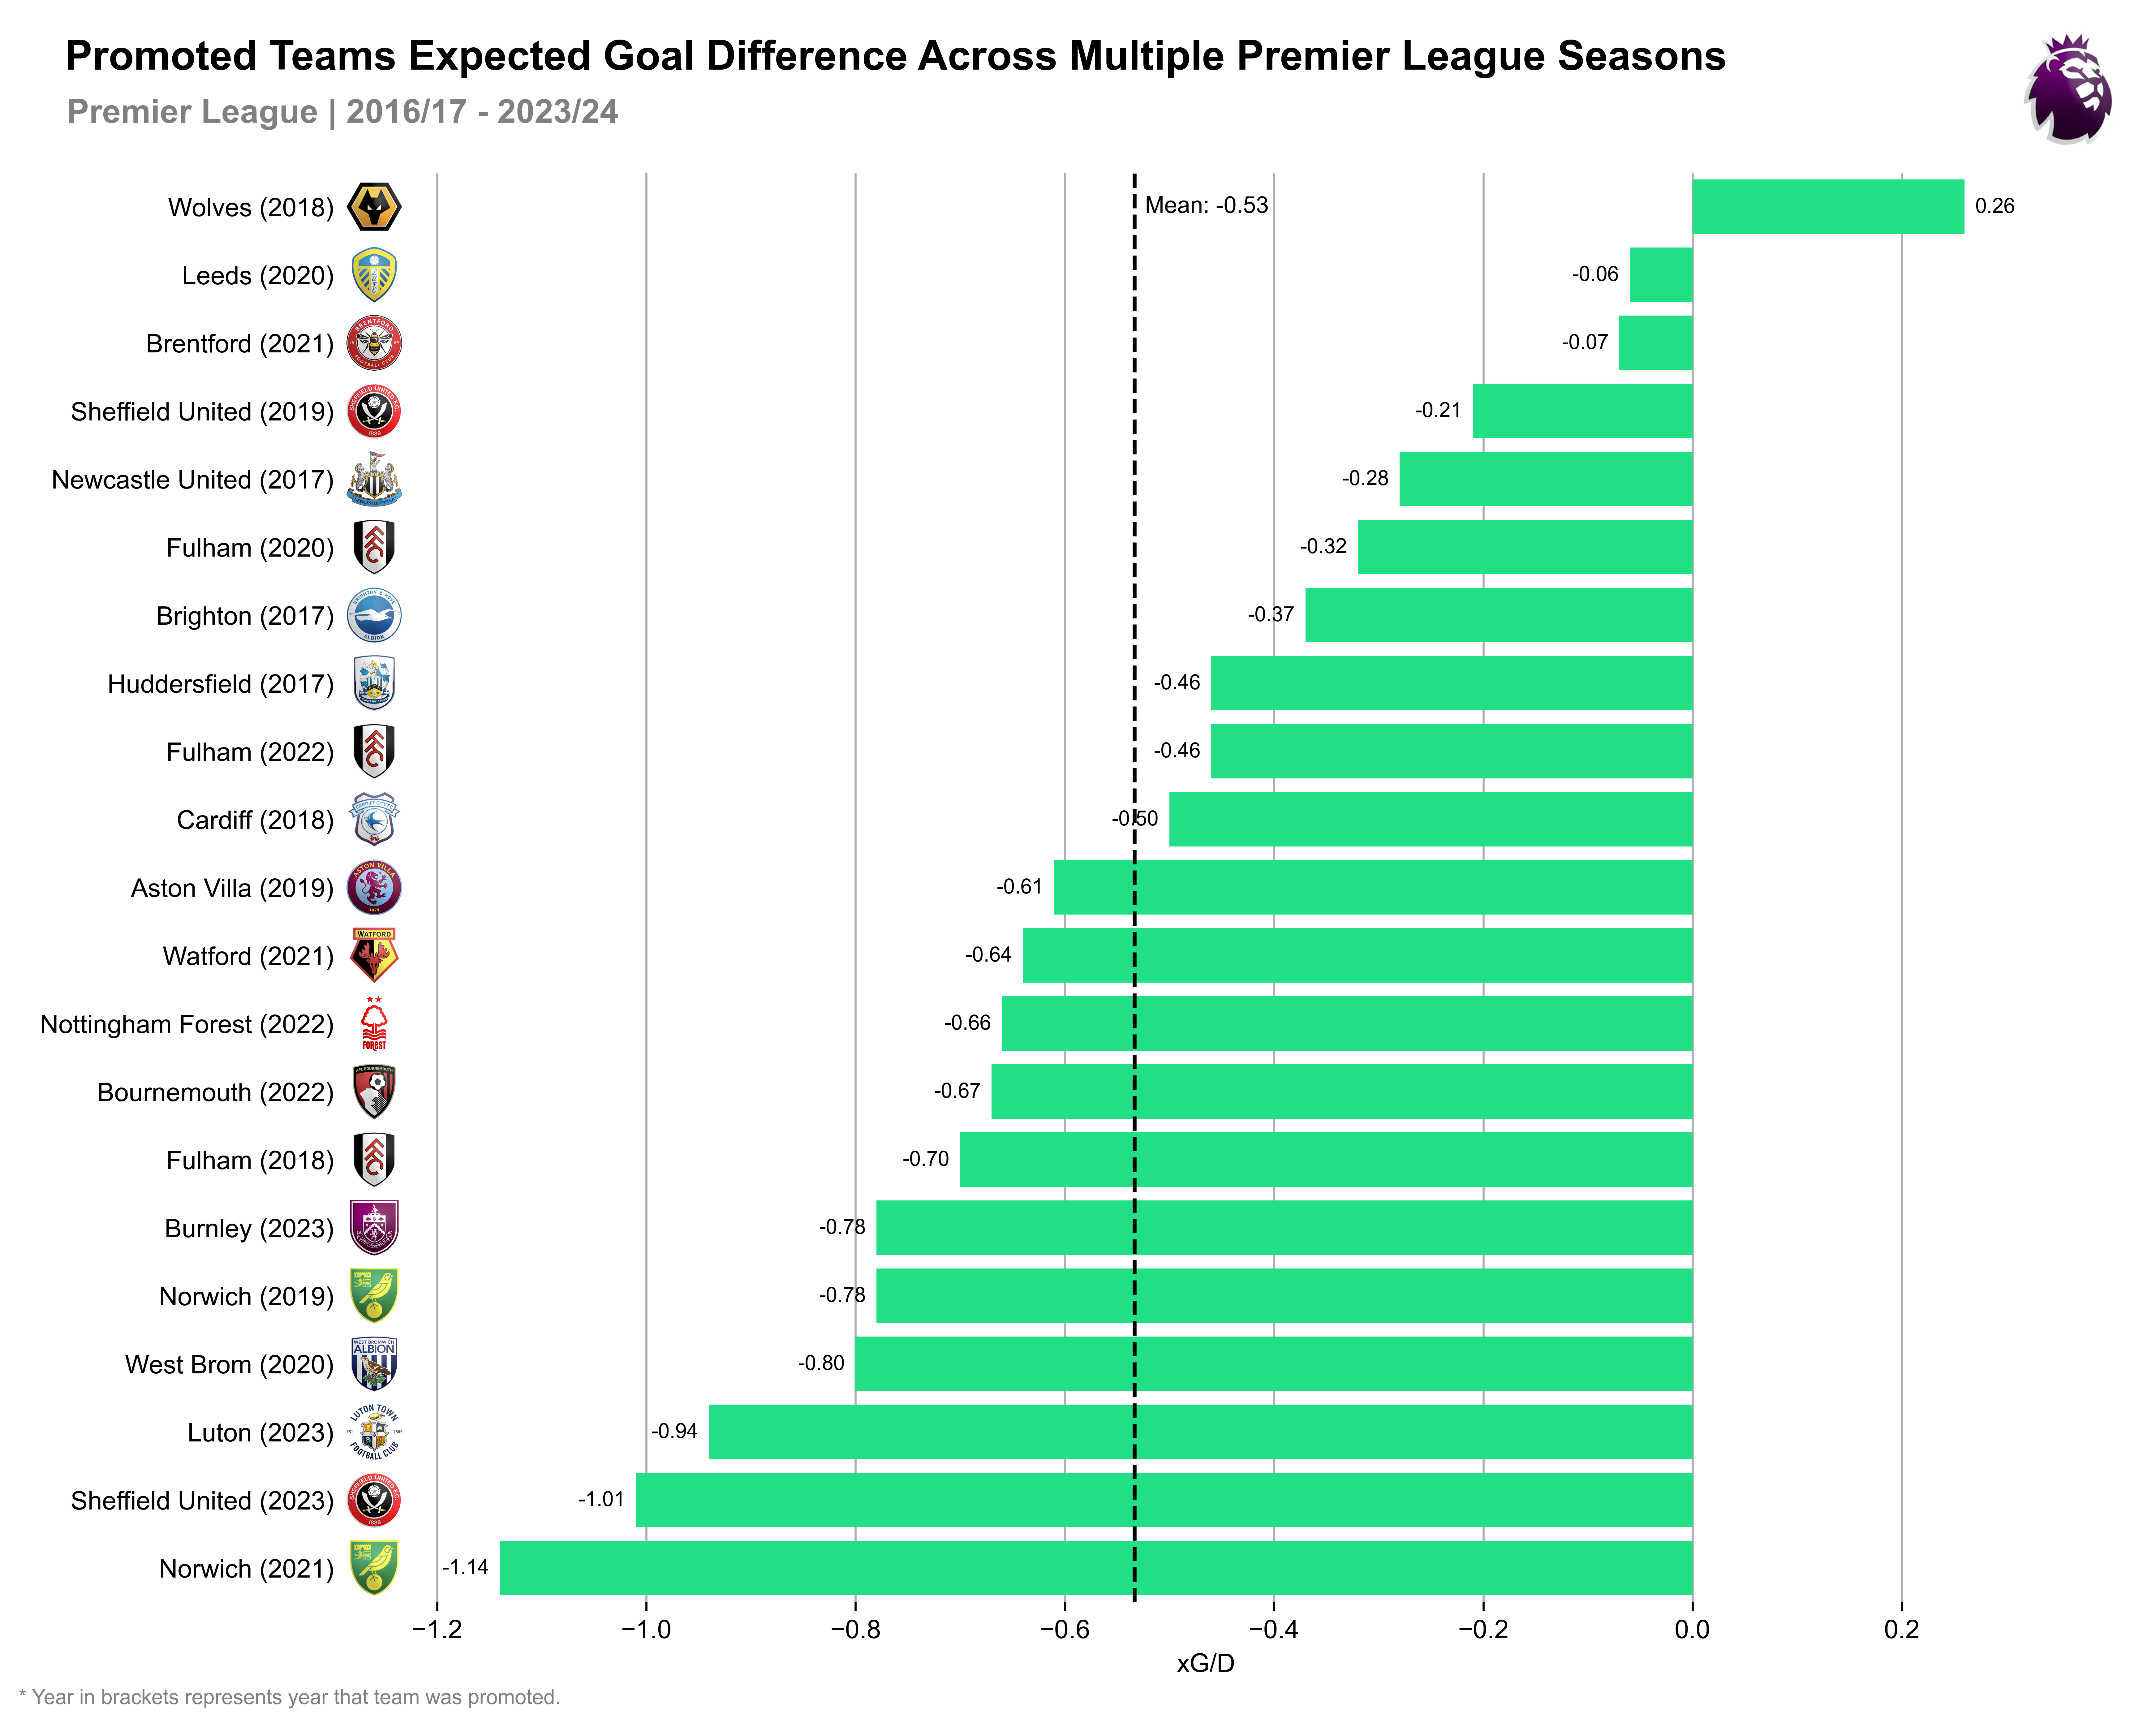

In [3]:
df_prem_xgd_sorted = df.sort_values(by="PRE xGD", ascending=False).reset_index()
mean_prem_xgd = df["PRE xGD"].mean()

plt.rcParams.update({
    'font.family': 'arial'
})

plt.figure(figsize=(12, 10), dpi=600)

plt.xlim(min(df_prem_xgd_sorted["PRE xGD"]) - 0.15, max(df_prem_xgd_sorted["PRE xGD"]) + 0.1)

ax = sns.barplot(y="Team-Year", x="PRE xGD", data=df_prem_xgd_sorted, color="#00ff85")

for i, team_year in enumerate(df_prem_xgd_sorted['Team-Year']):
    team = team_year.split(" (")[0]

    y_val = i  
    x_val = df_prem_xgd_sorted.loc[i, "PRE xGD"]
    
    logo_path = logo_dict[team]
    
    logo_image = OffsetImage(plt.imread(logo_path), zoom=0.12) 
    
    # Adjust logo placement for negative values
    ab = AnnotationBbox(logo_image, (min(df_prem_xgd_sorted["PRE xGD"]) - 0.12, y_val), frameon=False, box_alignment=(0.5, 0.5))  
    ax.add_artist(ab)

    # Adjust text placement for negative values
    plt.text(x_val + 0.01 if x_val >= 0 else x_val - 0.01, y_val+0.01, f"{x_val:.2f}", va="center", ha="left" if x_val >= 0 else "right", 
             fontdict={"fontsize": 8, "color": "black"})

# Mean line and text
plt.axvline(mean_prem_xgd, color="black", linestyle="--", linewidth=1.5)
plt.text(mean_prem_xgd + 0.01, 0, "Mean: {:.2f}".format(mean_prem_xgd), 
         color="black", va="center", fontdict={"fontsize": 9})

plt.ylabel("")
ax.tick_params(axis="y", which="both", length=0)
plt.xlabel("xG/D")

plt.title("Promoted Teams Expected Goal Difference Across Multiple Premier League Seasons", fontdict={"fontweight":"bold", "fontsize":16}, pad=40, loc="left", x=-0.161)
plt.suptitle("Premier League | 2016/17 - 2023/24", y=0.92, ha="left", x=0.001, fontsize=13, weight="bold", color="grey")

prem_logo = OffsetImage(plt.imread(r"images/11.png"), zoom=0.25)
ab = AnnotationBbox(prem_logo, xy=(1, 1.06), xycoords="axes fraction", frameon=False, box_alignment=(0.5, 0.5))
ax.add_artist(ab)

sns.despine(left=True, bottom=True)
plt.gca().set_axisbelow(True)
plt.grid(True, axis='x')

plt.text(-1.6, 22, "* Year in brackets represents year that team was promoted.",
         color="grey", fontdict={"fontsize": 8})


plt.show()


#TODO: Analysis on outliers

TODO: Analysis of above percentage changes

In [4]:
total_prem_games = 380
total_champ_games = 552

df["average_xg_per_game_champ"] = (df["CHA Total xG"] / total_champ_games) / 2 #divide by 2 to account for that 2 teams play each game so xG is shared between both
df["average_xg_per_game_prem"] = (df["PRE Total xG"] / total_prem_games) / 2

df["normalised_xg_per_game_champ"] = df["CHA xG"] / df["average_xg_per_game_champ"]
df["normalised_xga_per_game_champ"] = df["CHA xGA"] / df["average_xg_per_game_champ"]

df["normalised_xg_per_game_prem"] = df["PRE xG"] / df["average_xg_per_game_prem"]
df["normalised_xga_per_game_prem"] = df["PRE xGA"] / df["average_xg_per_game_prem"]

df["normalised_xg_diff"] = (df["normalised_xg_per_game_prem"] - df["normalised_xg_per_game_champ"]) / df["normalised_xg_per_game_champ"]
df["normalised_xga_diff"] = (df["normalised_xga_per_game_prem"] - df["normalised_xga_per_game_champ"]) / df["normalised_xga_per_game_champ"]

print(f"Average Normalised Change in xG: ", {df["normalised_xg_diff"].mean()})
print(f"Average Normalised Change in xGA: ", {df["normalised_xga_diff"].mean()})

Average Normalised Change in xG:  {-0.3349004487413663}
Average Normalised Change in xGA:  {0.4647776057656386}


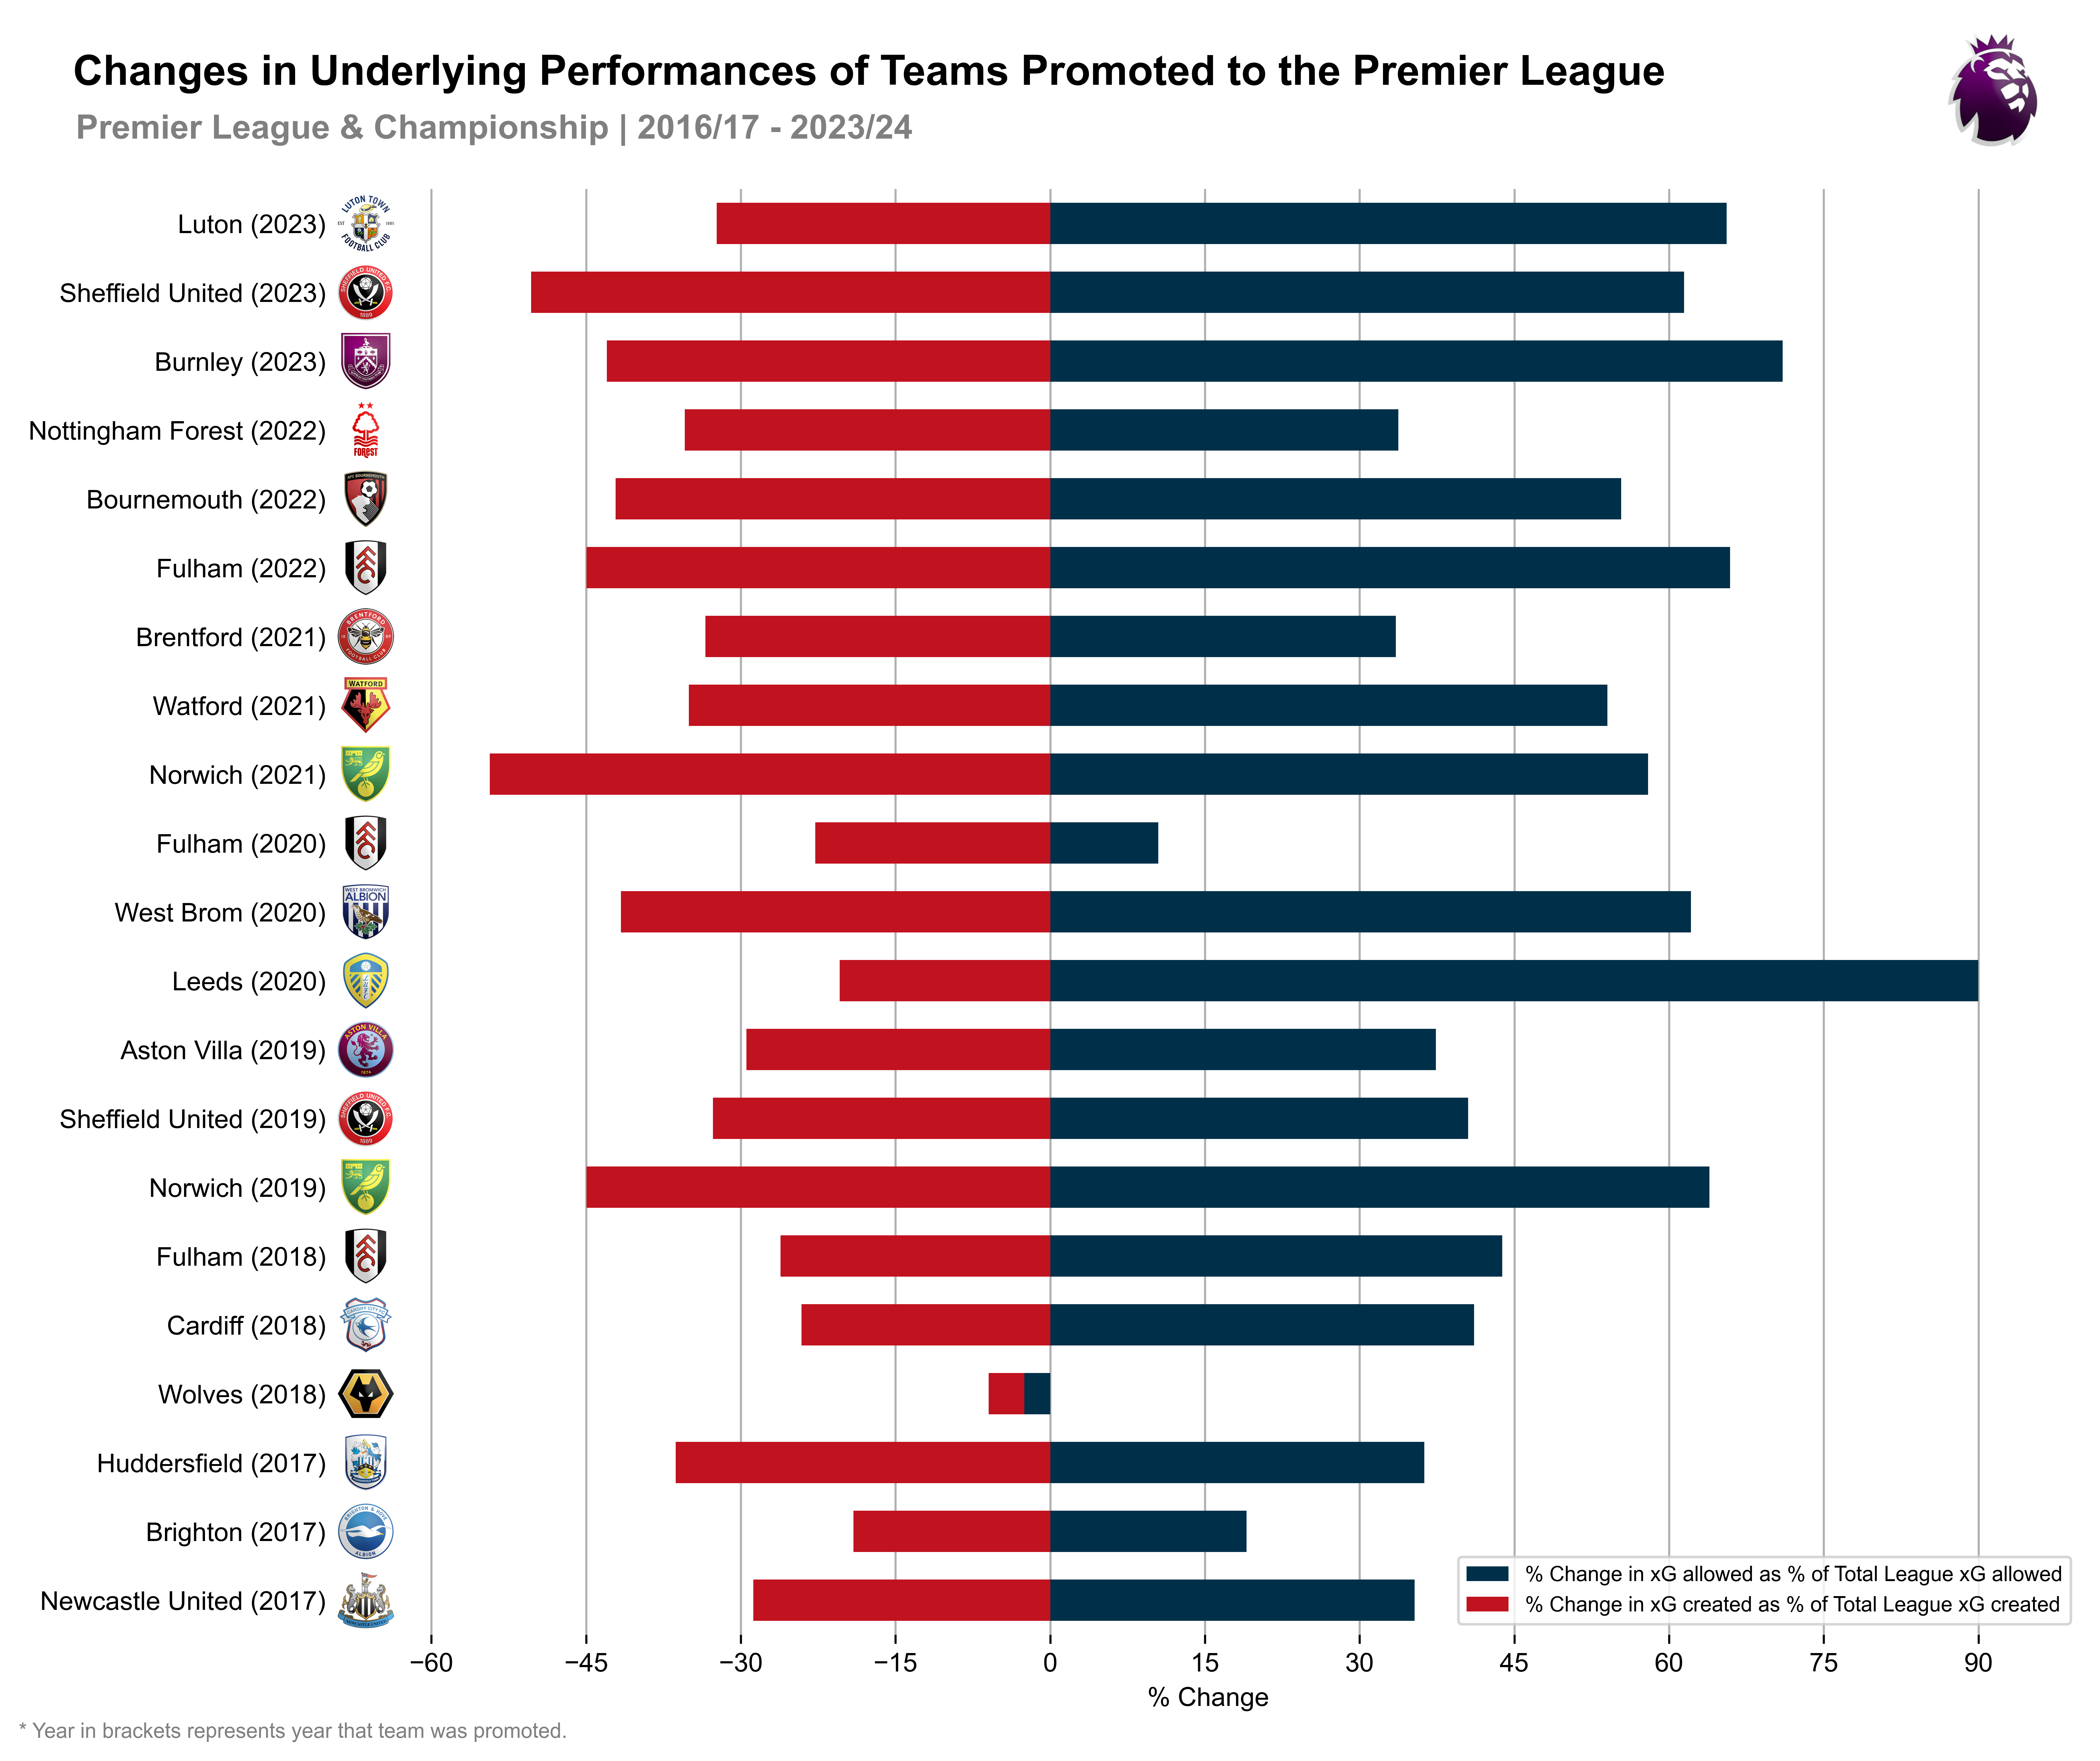

In [5]:
from matplotlib.ticker import MaxNLocator
import numpy as np

categories = df["Team-Year"]
values1 = df["normalised_xg_diff"] * 100
values2 = df["normalised_xga_diff"] * 100

y_pos = np.arange(len(categories))
bar_width = 0.6

plt.rcParams.update({
    'font.family': 'arial'
})

plt.figure(figsize=(12, 10), dpi=600)

ax = plt.gca()

# Plotting the bars with labels for the legend
for i, (val1, val2) in enumerate(zip(values1, values2)):
    if abs(val1) < abs(val2):
        # If val1 is lower, draw it on top
        ax.barh(y_pos[i], val2, height=bar_width, color="#003049", zorder=2, label=r"% Change in xG allowed as % of Total League xG allowed" if i == 0 else "")
        ax.barh(y_pos[i], val1, height=bar_width, color="#c1121f", zorder=3, label=r"% Change in xG created as % of Total League xG created" if i == 0 else "")
    else:
        # If val2 is lower, draw it on top
        ax.barh(y_pos[i], val1, height=bar_width, color="#c1121f", zorder=2, label=r"% Change in xG created as % of Total League xG created" if i == 0 else "")
        ax.barh(y_pos[i], val2, height=bar_width, color="#003049", zorder=3, label=r"% Change in xG allowed as % of Total League xG allowed" if i == 0 else "")

plt.xlim(min(values1) - 15, max(values2) + 10)
plt.ylim(-0.5, len(categories) - 0.5)

plt.yticks(y_pos, categories)
ax.tick_params(axis='y', which='both', length=0)
plt.xlabel('% Change')
plt.title("Changes in Underlying Performances of Teams Promoted to the Premier League", fontdict={"fontweight": "bold", "fontsize": 16}, pad=40, loc="left", x=-0.15)
plt.suptitle("Premier League & Championship | 2016/17 - 2023/24", y=0.92, ha="left", x=0.01, fontsize=13, weight="bold", color="grey")

# Adding team logos next to each bar
for i, team_year in enumerate(categories):
    team = team_year.split(" (")[0]
    
    # Adding logos
    logo_path = logo_dict[team]
    logo_image = OffsetImage(plt.imread(logo_path), zoom=0.12)
    
    ab = AnnotationBbox(logo_image, (min(values1) - 12, i), frameon=False, box_alignment=(0.5, 0.5))  
    ax.add_artist(ab)

# Adding the legend
plt.legend(loc='best', frameon=True, fontsize=8)

# Adjust the appearance
sns.despine(left=True, bottom=True)
plt.gca().set_axisbelow(True)
ax.xaxis.set_major_locator(MaxNLocator(nbins=15))
plt.grid(True, axis='x', which="major")

prem_logo = OffsetImage(plt.imread(r"images/11.png"), zoom=0.25)
ab = AnnotationBbox(prem_logo, xy=(0.95, 1.07), xycoords="axes fraction", frameon=False, box_alignment=(0.5, 0.5))
ax.add_artist(ab)

# Footer text
plt.text(-100, -2, "* Year in brackets represents year that team was promoted.",
         color="grey", fontdict={"fontsize": 8})

# Displaying the plot
plt.show()


#TODO: Analysis for above.